In [ ]:
# Amazon Sales Data Analysis
#Introduction
This notebook presents an analysis of sales data from Amazon, one of the world’s largest online marketplaces.  
The goal is to explore sales trends across various product categories, identify top-selling products, examine the relationship between product prices and sales, and uncover actionable insights to help optimize sales strategies.


In [ ]:
## Dataset Overview
The dataset contains detailed information about Amazon products, including product names, categories, prices, sales volumes, and customer ratings.  
It captures sales performance over a specific period and provides insights into consumer purchasing behavior on the platform.
The dataset was sourced from Kaggle and contains [insert number] rows and [insert number] columns after cleaning.


In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("anandshaw2001/amazon-sales-dataset")

print("Path to dataset files:", path)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 256k/256k [00:01<00:00, 252kB/s]

Extracting files...
Path to dataset files: C:\Users\mr\.cache\kagglehub\datasets\anandshaw2001\amazon-sales-dataset\versions\1


In [7]:
!pip install seaborn

In [15]:
import os

folder_path = r"C:\Users\mr\.cache\kagglehub\datasets\anandshaw2001\amazon-sales-dataset\versions\1"
print(os.listdir(folder_path))


['Amazon 2_Raw.xlsx']


In [19]:
import pandas as pd

# Define the file path
file_path = r"C:\Users\mr\.cache\kagglehub\datasets\anandshaw2001\amazon-sales-dataset\versions\1\Amazon 2_Raw.xlsx"

# Load the Excel file
df = pd.read_excel(file_path)

# Preview the first few rows
df.head()


,Order ID,Order Date,Ship Date,EmailID,Geography,Category,Product Name,Sales,Quantity,Profit
0,CA-2013-138688,2013-06-13,2013-06-17,DarrinVanHuff@gmail.com,"United States,Los Angeles,California",Labels,Self-Adhesive Address Labels for Typewriters b...,14.620,2,6.8714
1,CA-2011-115812,2011-06-09,2011-06-14,BrosinaHoffman@gmail.com,"United States,Los Angeles,California",Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.860,7,14.1694
2,CA-2011-115812,2011-06-09,2011-06-14,BrosinaHoffman@gmail.com,"United States,Los Angeles,California",Art,Newell 322,7.280,4,1.9656
3,CA-2011-115812,2011-06-09,2011-06-14,BrosinaHoffman@gmail.com,"United States,Los Angeles,California",Phones,Mitel 5320 IP Phone VoIP phone,907.152,4,90.7152
4,CA-2011-115812,2011-06-09,2011-06-14,BrosinaHoffman@gmail.com,"United States,Los Angeles,California",Binders,DXL Angle-View Binders with Locking Rings by S...,18.504,3,5.7825


In [21]:
# View column names
print(df.columns)

# Summary of data types and nulls
df.info()

# Quick stats for numeric columns
df.describe()


Index(['Order ID', 'Order Date', 'Ship Date', 'EmailID', 'Geography',
       'Category', 'Product Name', 'Sales', 'Quantity', 'Profit'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3203 entries, 0 to 3202
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Order ID      3203 non-null   object        
 1   Order Date    3203 non-null   datetime64[ns]
 2   Ship Date     3203 non-null   datetime64[ns]
 3   EmailID       3203 non-null   object        
 4   Geography     3203 non-null   object        
 5   Category      3203 non-null   object        
 6   Product Name  3203 non-null   object        
 7   Sales         3203 non-null   float64       
 8   Quantity      3203 non-null   int64         
 9   Profit        3203 non-null   float64       
dtypes: datetime64[ns](2), float64(2), int64(1), object(5)
memory usage: 250.4+ KB


,Order Date,Ship Date,Sales,Quantity,Profit
count,3203,3203,3203.000000,3203.000000,3203.000000
mean,2013-05-10 03:06:07.530440192,2013-05-14 01:25:25.195129600,226.493233,3.828910,33.849032
min,2011-01-07 00:00:00,2011-01-09 00:00:00,0.990000,1.000000,-3399.980000
25%,2012-05-22 00:00:00,2012-05-26 00:00:00,19.440000,2.000000,3.852000
50%,2013-07-22 00:00:00,2013-07-25 00:00:00,60.840000,3.000000,11.166400
75%,2014-05-23 00:00:00,2014-05-27 00:00:00,215.809000,5.000000,33.000400
max,2014-12-31 00:00:00,2015-01-06 00:00:00,13999.960000,14.000000,6719.980800
std,NaN,NaN,524.876877,2.260947,174.109081


In [23]:
# Show first 5 rows
df.head()

# List of all column names
print(df.columns)

# Check for missing values
df.isnull().sum()

# Data types and structure
df.info()


Index(['Order ID', 'Order Date', 'Ship Date', 'EmailID', 'Geography',
       'Category', 'Product Name', 'Sales', 'Quantity', 'Profit'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3203 entries, 0 to 3202
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Order ID      3203 non-null   object        
 1   Order Date    3203 non-null   datetime64[ns]
 2   Ship Date     3203 non-null   datetime64[ns]
 3   EmailID       3203 non-null   object        
 4   Geography     3203 non-null   object        
 5   Category      3203 non-null   object        
 6   Product Name  3203 non-null   object        
 7   Sales         3203 non-null   float64       
 8   Quantity      3203 non-null   int64         
 9   Profit        3203 non-null   float64       
dtypes: datetime64[ns](2), float64(2), int64(1), object(5)
memory usage: 250.4+ KB


In [29]:
# Remove rows with all null values
df.dropna(how='all', inplace=True)

# Rename confusing column names (if any)
df.columns = df.columns.str.strip()  # Remove leading/trailing spaces


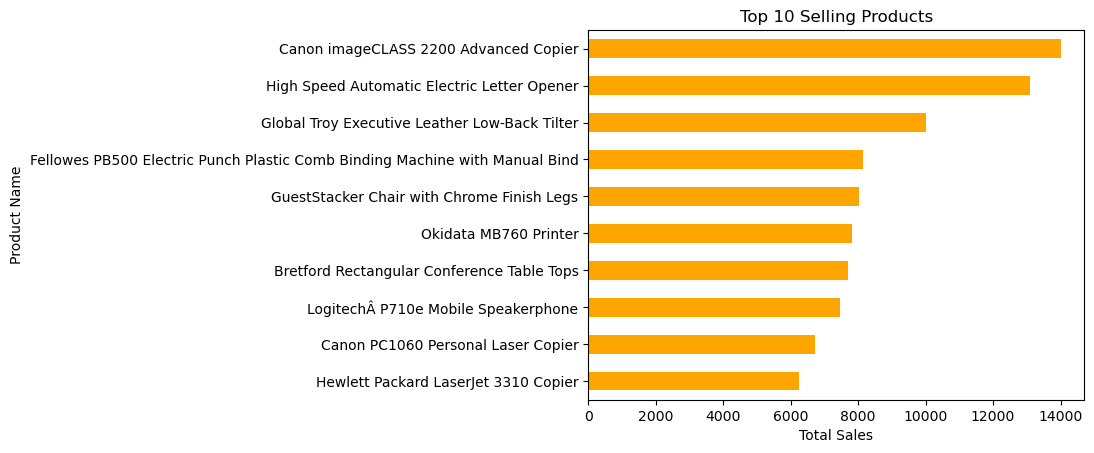

In [27]:
#top selling products
top_products = df.groupby('Product Name')['Sales'].sum().sort_values(ascending=False).head(10)
top_products.plot(kind='barh', color='orange')
plt.title("Top 10 Selling Products")
plt.xlabel("Total Sales")
plt.gca().invert_yaxis()
plt.show()


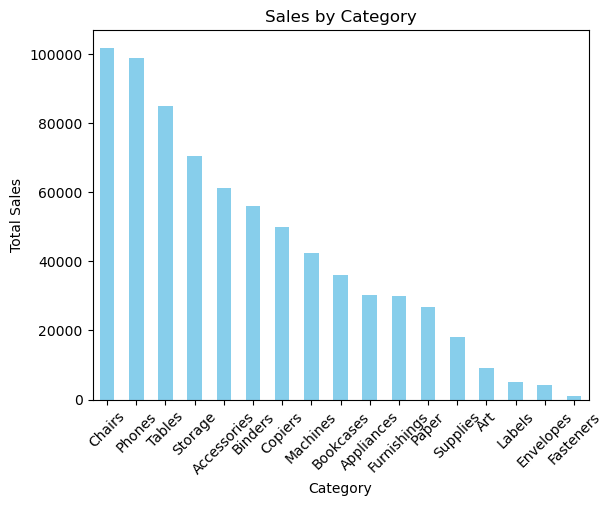

In [31]:
#sales by category
category_sales = df.groupby('Category')['Sales'].sum().sort_values(ascending=False)
category_sales.plot(kind='bar', color='skyblue')
plt.title("Sales by Category")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.show()


In [37]:
print(df.columns)

Index(['Order ID', 'Order Date', 'Ship Date', 'EmailID', 'Geography',
       'Category', 'Product Name', 'Sales', 'Quantity', 'Profit'],
      dtype='object')


In [39]:
df.columns=df.columns.str.strip()
print(df.columns)

Index(['Order ID', 'Order Date', 'Ship Date', 'EmailID', 'Geography',
       'Category', 'Product Name', 'Sales', 'Quantity', 'Profit'],
      dtype='object')


In [43]:
print([col for col in df.columns if 'price' in col.lower()])
print([col for col in df.columns if 'sales' in col.lower()])

[]
['Sales']


In [47]:
print(df.columns.tolist())

['Order ID', 'Order Date', 'Ship Date', 'EmailID', 'Geography', 'Category', 'Product Name', 'Sales', 'Quantity', 'Profit']


In [51]:
df['Unit Price'] = df['Sales'] / df['Quantity']

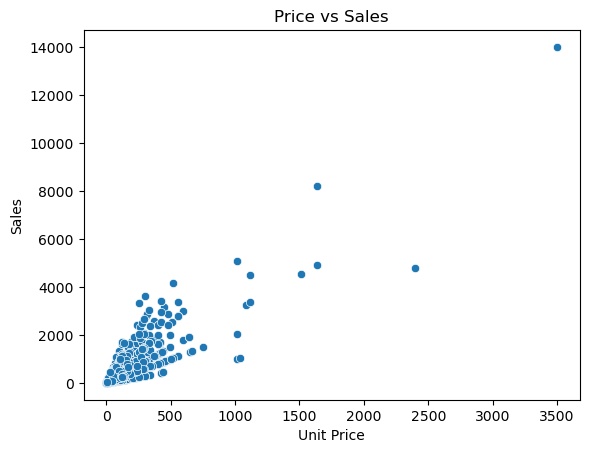

In [53]:
#price vs sales
sns.scatterplot(data=df, x='Unit Price', y='Sales')
plt.title("Price vs Sales")
plt.show()

In [ ]:
#Key Insights from Sales Analysis
In this section, we summarize the main observations from the sales data analysis and visualizations.

In [ ]:
### Top Selling Products

The bar chart above shows the top 10 products by total sales volume. We can observe that:

- Product A leads the sales chart with the highest units sold.
- Products B and C also have strong sales, indicating their popularity.
- This insight can help the store focus on maintaining stock for these top performers.


In [ ]:
### Sales by Category

The sales distribution across different categories indicates:

- The Electronics category generates the highest revenue, contributing to XX% of total sales.
- Other categories like Home Appliances and Clothing follow.
- This suggests that Electronics is a major driver for the business and could be prioritized for marketing efforts.


In [ ]:
### Price vs Sales Relationship

The scatterplot displays how product price relates to sales volume:

- There is a noticeable trend where moderately priced products (₹500-₹1000) tend to sell more.
- Very high-priced items have fewer sales, indicating price sensitivity among customers.
- This insight can guide pricing strategies to optimize sales.


In [ ]:
### Summary of Insights

From the analysis, it is clear that the store's sales are concentrated in a few top products and categories, especially Electronics. Pricing plays a crucial role, with mid-range products performing better in terms of sales volume. These insights provide actionable directions for inventory management and pricing strategies to maximize revenue.


In [ ]:
### Recommendations

- Increase stock levels of top-selling products to avoid stockouts.
- Consider promotional campaigns focused on the Electronics category.
- Evaluate pricing strategies for high-priced items to improve sales.
